In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix



In [2]:
data_income=pd.read_csv('income.csv')
data=data_income.copy()

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [4]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [5]:
summary=data.describe()
print(summary)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [6]:
summary_cate=data.describe(include='O')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [7]:
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [9]:
data=pd.read_csv('income.csv',na_values=[" ?"])
data.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [10]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [11]:
missing=data[data.isnull().any(axis=1)]

In [12]:
missing.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [13]:
data2=data.dropna(axis=0)

In [14]:
correlation=data2.corr()

In [15]:
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [16]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [17]:
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [18]:
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat']
                         ,margins=True,normalize='index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


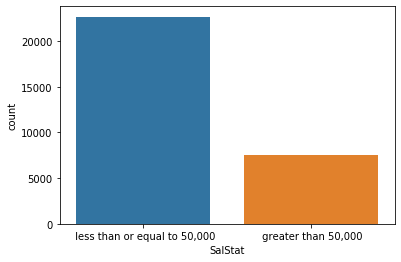

In [19]:
Salstat=sns.countplot(data2['SalStat'])

<IPython.core.display.Javascript object>


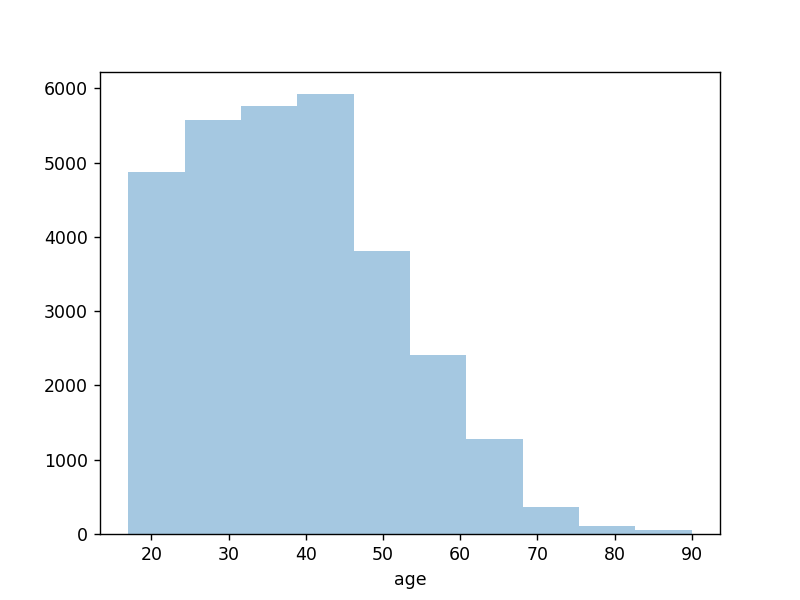

In [66]:
sns.distplot(data2['age'],bins=10,kde=False)

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

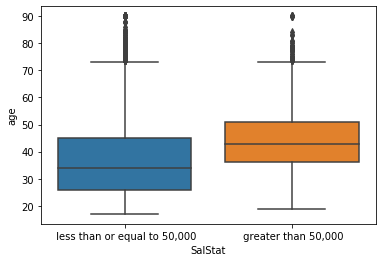

In [21]:
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()

In [22]:
job_salstat=pd.crosstab(index=data2['JobType'],columns=data2['SalStat']
                         ,margins=True,normalize='index')
print(job_salstat)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.248922                       0.751078


[Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' State-gov'),
 Text(0, 0, ' Without-pay')]

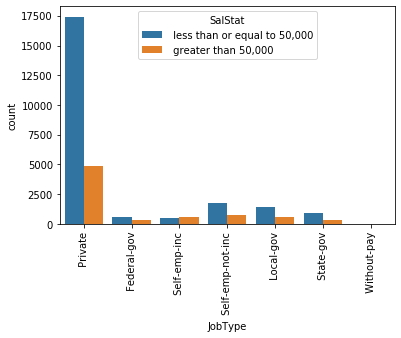

In [23]:
Salstat=sns.countplot(x=data2['JobType'],data=data2,hue=data2['SalStat'])
Salstat.set_xticklabels(Salstat.get_xticklabels(),rotation=90)

In [24]:
edu_salstat=pd.crosstab(index=data2['EdType'],columns=data2['SalStat']
                         ,margins=True,normalize='index')
print(edu_salstat)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

[Text(0, 0, ' HS-grad'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Bachelors'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 12th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Preschool')]

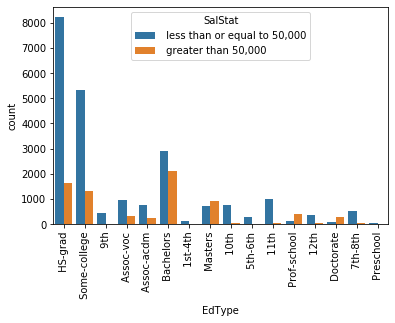

In [25]:
ed=sns.countplot(x=data2['EdType'],data=data2,hue=data2['SalStat'])
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)

In [26]:
occ_salstat=pd.crosstab(index=data2['occupation'],columns=data2['SalStat']
                         ,margins=True,normalize='index')
print(occ_salstat)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Priv-house-serv')]

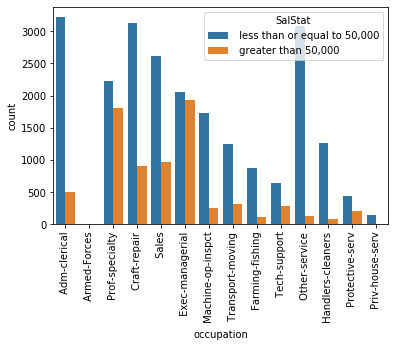

In [27]:
occ=sns.countplot(x=data2['occupation'],data=data2,hue=data2['SalStat'])
occ.set_xticklabels(occ.get_xticklabels(),rotation=90)

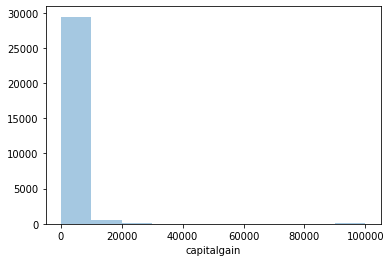

In [28]:
sns.distplot(data2['capitalgain'],bins=10,kde=False)

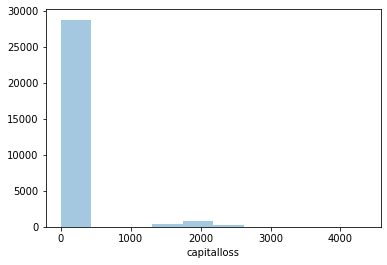

In [29]:
sns.distplot(data2['capitalloss'],bins=10,kde=False)

In [67]:
hr_salstat=pd.crosstab(index=data2['hoursperweek'],columns=data2['SalStat']
                         ,margins=True,normalize='index')
print(hr_salstat)

SalStat              0         1
hoursperweek                    
1             0.857143  0.142857
2             0.866667  0.133333
3             0.958333  0.041667
4             0.925926  0.074074
5             0.842105  0.157895
...                ...       ...
96            0.800000  0.200000
97            0.500000  0.500000
98            0.727273  0.272727
99            0.679487  0.320513
All           0.751078  0.248922

[95 rows x 2 columns]


SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

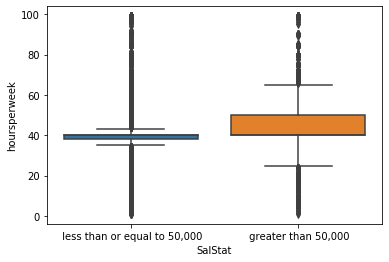

In [31]:
sns.boxplot('SalStat','hoursperweek',data=data2)
data2.groupby('SalStat')['hoursperweek'].median()

# Logistic regression

In [32]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
new_data=pd.get_dummies(data2,drop_first=True)
new_data.shape

(30162, 95)

In [76]:
column_list=list(new_data.columns)
print(column_list)


['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [78]:
features=list(set(column_list)-set(['SalStat']))
print(len(features))
print(features)
#print(set(['SalStat']))

94
['nativecountry_ Cuba', 'nativecountry_ Portugal', 'occupation_ Transport-moving', 'EdType_ Masters', 'nativecountry_ Japan', 'nativecountry_ El-Salvador', 'JobType_ Without-pay', 'nativecountry_ Holand-Netherlands', 'occupation_ Handlers-cleaners', 'nativecountry_ Vietnam', 'EdType_ Assoc-voc', 'nativecountry_ Dominican-Republic', 'maritalstatus_ Married-AF-spouse', 'JobType_ Private', 'nativecountry_ Haiti', 'relationship_ Not-in-family', 'JobType_ Local-gov', 'EdType_ Preschool', 'occupation_ Priv-house-serv', 'EdType_ Some-college', 'nativecountry_ Hungary', 'JobType_ Self-emp-not-inc', 'nativecountry_ India', 'EdType_ 9th', 'nativecountry_ Poland', 'nativecountry_ Trinadad&Tobago', 'nativecountry_ Nicaragua', 'nativecountry_ Canada', 'nativecountry_ Germany', 'race_ Other', 'nativecountry_ France', 'occupation_ Other-service', 'JobType_ Self-emp-inc', 'nativecountry_ China', 'nativecountry_ Puerto-Rico', 'capitalloss', 'nativecountry_ Laos', 'relationship_ Wife', 'occupation_ M

In [79]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [89]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [81]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)
print(train_x)
print(test_x)
print(train_y)
print(test_y)

[[0 0 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [82]:
logistic=LogisticRegression()
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

/home/prachi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([-1.04067212])

In [83]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [85]:
confusion_matrix=confusion_matrix(test_y,prediction)
print(confusion_mat)

TypeError: 'numpy.ndarray' object is not callable

In [86]:
accuracy_sc=accuracy_score(test_y,prediction)
print(accuracy_sc)

0.8365565255829374


In [87]:
print("Misclassified samples: %d" % (test_y!=prediction).sum())

Misclassified samples: 1479


# Logistic regression removing insignific. vars.

In [44]:
data3=data_income.copy()
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [45]:
cols=['gender','nativecountry','race','JobType']
new_data=data3.drop(cols,axis=1)

In [46]:
new_data=pd.get_dummies(new_data,drop_first=True)
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [47]:
column_list=list(new_data.columns)
print(column_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-famil

In [48]:
features=list(set(column_list)-set(['SalStat']))
print(features)

['EdType_ Assoc-acdm', 'occupation_ Transport-moving', 'EdType_ 7th-8th', 'EdType_ 1st-4th', 'relationship_ Own-child', 'occupation_ Handlers-cleaners', 'occupation_ Prof-specialty', 'EdType_ Assoc-voc', 'maritalstatus_ Married-AF-spouse', 'relationship_ Not-in-family', 'EdType_ Preschool', 'maritalstatus_ Married-spouse-absent', 'occupation_ Priv-house-serv', 'EdType_ Some-college', 'occupation_ Armed-Forces', 'maritalstatus_ Never-married', 'EdType_ 9th', 'occupation_ Other-service', 'hoursperweek', 'occupation_ Adm-clerical', 'capitalloss', 'EdType_ Bachelors', 'relationship_ Wife', 'EdType_ Prof-school', 'occupation_ Machine-op-inspct', 'EdType_ 5th-6th', 'EdType_ 12th', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'EdType_ Doctorate', 'occupation_ Farming-fishing', 'occupation_ Tech-support', 'relationship_ Unmarried', 'EdType_ 11th', 'occupation_ Craft-repair', 'occupation_ Sales', 'maritalstatus_ Married-civ-spouse', 'age', 'occupation_ Exec-managerial', 'occupation_ Pr

In [49]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [50]:
x=new_data[features].values
print(x)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)
print("train_x",train_x)
print("test_x",test_x)
print('train_y',train_y)
print('test_y',test_y)

train_x [[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]]
test_x [[0 1 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
train_y [0 0 0 ... 0 1 0]
test_y [0 0 1 ... 0 0 0]


In [52]:
logistic=LogisticRegression()
logistic.fit(train_x,train_y)
print(logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/home/prachi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
prediction=logistic.predict(test_x)
print(prediction)
print(test_y)

[0 0 0 ... 0 0 0]
[0 0 1 ... 0 0 0]


In [54]:
accuracy_sc=accuracy_score(test_y,prediction)
print(accuracy_sc)

0.8470919324577861


In [55]:
print("Misclassified samples: %d" % (test_y!=prediction).sum())

Misclassified samples: 1467


# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [57]:
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [58]:
KNN_classifier.fit(train_x,train_y)
prediction=KNN_classifier.predict(test_x)

In [59]:
confusion_matrix=confusion_matrix(test_y,prediction)
print("\t","Predicted values")
print("Original values","\n",confusion_matrix)
#6693 observations are predicted correct for sal <50000 and 643 it predicted >50000 
#1373 observations are predicted correct for sal >50000 and 885 it predicted <50000 



	 Predicted values
Original values 
 [[6695  641]
 [ 885 1373]]


In [60]:
accuracy_sc=accuracy_score(test_y,prediction)
print(accuracy_sc)

0.8409422555764019


In [61]:
print("Misclassified samples: %d" % (test_y!=prediction).sum())

Misclassified samples: 1526


In [62]:
Misclassified_sample=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    val=(test_y!=prediction).sum()
    #print("i",i,"val",val)
    Misclassified_sample.append(val)
print(Misclassified_sample)

[1526, 1526, 1526, 1526, 1526]


In [63]:
confusion_mat=confusion_matrix(test_y,prediction)
print("\t","Predicted values")
print("Original values","\n",confusion_mat)

TypeError: 'numpy.ndarray' object is not callable